<a href="https://colab.research.google.com/github/SABARINATH-KR/machine/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_train, y_train, epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 5ms/step - loss: 0.1406 - accuracy: 0.9562 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0519 - val_accuracy: 0.9854
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0403 - val_accuracy: 0.9902


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9905
Test accuracy: 0.9904999732971191


313/313 [==============================] - 1s 3ms/step
Predicted class: 4


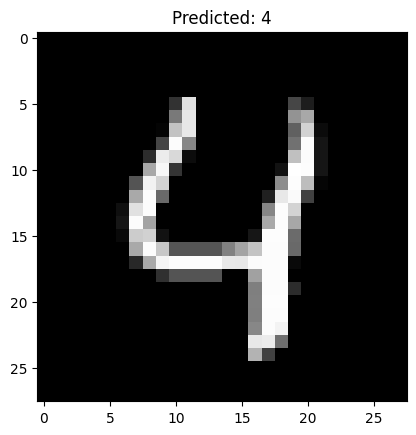

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num = 4

predictions = model.predict(x_test)
predicted_class = np.argmax(predictions[num])
print(f"Predicted class: {predicted_class}")

plt.imshow(x_test[num].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()